In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Flatten, LSTM, GRU, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
ser = np.sin((0.1*np.arange(400))**2)

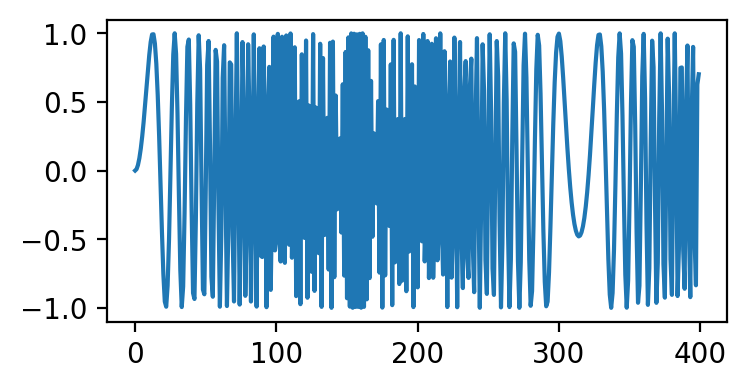

In [5]:
plt.figure(figsize=(4,2),dpi=200)
plt.plot(ser)

In [6]:
T = 10
X = []
Y = []
D = 1

for t in range(len(ser)-T):
  x = ser[t:t+T]
  X.append(x)
  y = ser[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
N

390

In [8]:
X.shape

(390, 10)

In [15]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.01),)

r = model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]),steps_per_epoch=195)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


195/195 [==============================] - 1s 2ms/step - loss: 1.0539 - val_loss: 0.5110
Epoch 2/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5400 - val_loss: 0.5774
Epoch 3/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5278 - val_loss: 0.5882
Epoch 4/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5217 - val_loss: 0.6026
Epoch 5/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5214 - val_loss: 0.5952
Epoch 6/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5229 - val_loss: 0.6047
Epoch 7/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5180 - val_loss: 0.5966
Epoch 8/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5208 - val_loss: 0.5666
Epoch 9/80
195/195 [==============================] - 0s 2ms/step - loss: 0.5234 - val_loss: 0.5925
Epoch 10/80
195/195 [==============================] - 0s 1ms/step - loss: 0.5317 - val_loss: 0.6033
Epoch 11/8

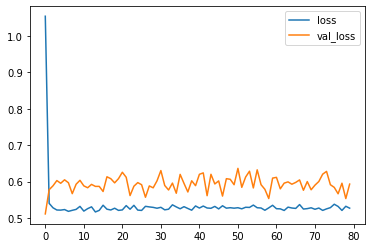

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [22]:
out = model.predict(X)
pred = out[:,0]

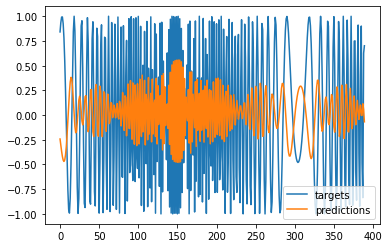

In [23]:
plt.plot(Y,label = 'targets')
plt.plot(pred,label='predictions')
plt.legend()

In [24]:
val_target = Y[-N//2:]
val_pred = []
last_x = X[-N//2]

while len(val_pred) < len(val_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  val_pred.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

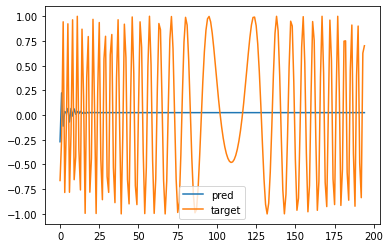

In [25]:
plt.plot(val_pred,label = 'pred')
plt.plot(val_target,label='target')
plt.legend();

In [38]:
#SimpleRNN
X = np.array(X).reshape(-1,T,1)

i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.05),)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 37ms/step - loss: 0.6924 - val_loss: 0.6531
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4994 - val_loss: 0.6045
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4726 - val_loss: 0.4592
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4311 - val_loss: 0.5203
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4541 - val_loss: 0.7645
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6709 - val_loss: 0.6950
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6996 - val_loss: 0.5121
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4756 - val_loss: 0.5732
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4014 - val_loss: 0.6020
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3452 - val_loss: 0.4075
Epoch 11/200
7/7 [===============

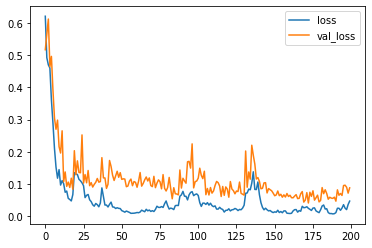

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

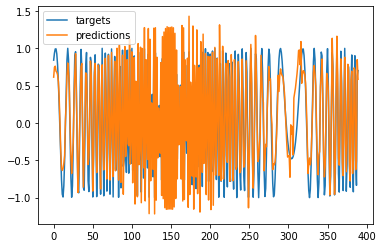

In [33]:
out = model.predict(X)
pred = out[:,0]
plt.plot(Y,label = 'targets')
plt.plot(pred,label='predictions')
plt.legend()


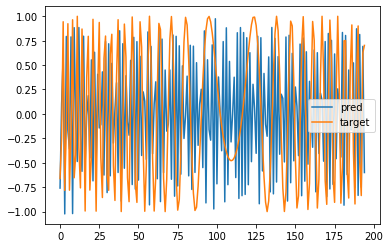

In [39]:
val_target = Y[-N//2:]
val_pred = []
last_x = X[-N//2]

while len(val_pred) < len(val_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  val_pred.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(val_pred,label = 'pred')
plt.plot(val_target,label='target')
plt.legend();

In [34]:
#LSTM
X = np.array(X).reshape(-1,T,1)

i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.05),)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 95ms/step - loss: 0.5473 - val_loss: 0.5420
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5020 - val_loss: 0.6398
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5129 - val_loss: 0.5163
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4820 - val_loss: 0.5344
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4172 - val_loss: 0.4937
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3243 - val_loss: 0.4338
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.2684 - val_loss: 0.4843
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2254 - val_loss: 0.2698
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1409 - val_loss: 0.2163
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1059 - val_loss: 0.1610
Epoch 11/200
7/7 [===============

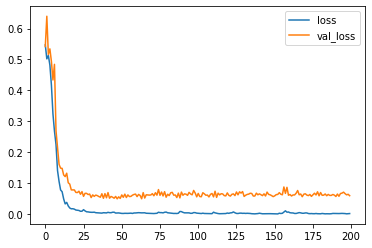

In [35]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

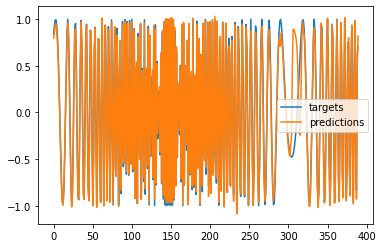

In [36]:
out = model.predict(X)
pred = out[:,0]
plt.plot(Y,label = 'targets')
plt.plot(pred,label='predictions')
plt.legend()

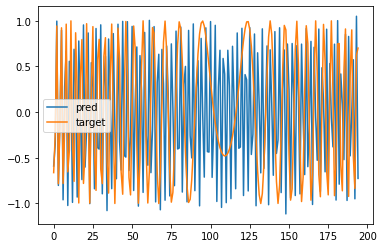

In [37]:
val_target = Y[-N//2:]
val_pred = []
last_x = X[-N//2]

while len(val_pred) < len(val_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  val_pred.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(val_pred,label = 'pred')
plt.plot(val_target,label='target')
plt.legend();